# Plotting user-weeks for a user


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import dtutil.configs as dtc  # import the datatools config variables
from helper import get_name_and_company

Next, we need to load in the feature file.  This file has one row for each user-week and a column for each feature in addition to information describing the user-week.

In [10]:
raw_data = pd.read_csv(dtc.paths.tlm_uwdata_file)  # this is the path to the features file
columns = ['week', 'user_id', 'activity', 'scope', 'disp_name', 'company']
df = raw_data[columns]
df.head()

,week,user_id,activity,scope,disp_name,company
0,800,190,0.887123,41.666667,Christian Bean,National Instruments - AWR Group
1,801,190,0.731066,36.111111,Christian Bean,National Instruments - AWR Group
2,802,190,0.706488,33.333333,Christian Bean,National Instruments - AWR Group
3,803,190,0.847379,45.833333,Christian Bean,National Instruments - AWR Group
4,804,190,0.858236,41.666667,Christian Bean,National Instruments - AWR Group


## Plot user-weeks for a specific user

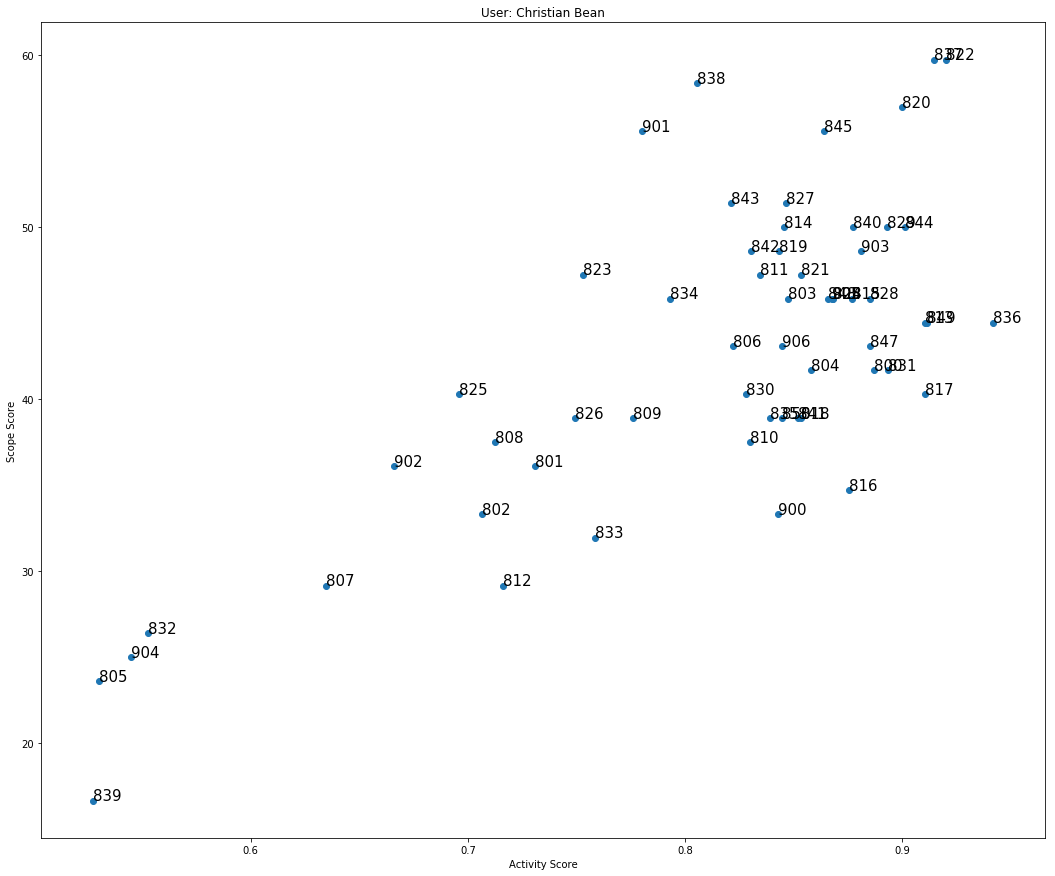

In [3]:
desired_user = 190
fig, ax = plt.subplots()
fig.set_size_inches(18,15)
data = df[df.user_id == desired_user]
plt.scatter(data.activity, data.scope)
for idx, row in data.iterrows():
    ax.annotate(str(row.week), (row.activity, row.scope), size=15)

ax.set_title('User: {}'.format(data.iloc[0].disp_name))
ax.set_ylabel('Scope Score')
ax.set_xlabel('Activity Score')
    
plt.plot();

## All users at a company

Plot the average of activity and scope scores for users at a company

In [4]:
company = 'qorvo'.lower()
data = df[df.company.apply(lambda x: company in str(x).lower())]
data.head()

,week,user_id,activity,scope,disp_name,company
1254,814,225,0.837832,31.944444,Mike Roberg at Qorvo,Qorvo - TQTX IDP Richardson
1255,817,225,0.762108,16.666667,Mike Roberg at Qorvo,Qorvo - TQTX IDP Richardson
1256,819,225,0.110149,2.777778,Mike Roberg at Qorvo,Qorvo - TQTX IDP Richardson
1257,832,225,0.891570,22.222222,Mike Roberg at Qorvo,Qorvo - TQTX IDP Richardson
1258,833,225,0.323150,16.666667,Mike Roberg at Qorvo,Qorvo - TQTX IDP Richardson


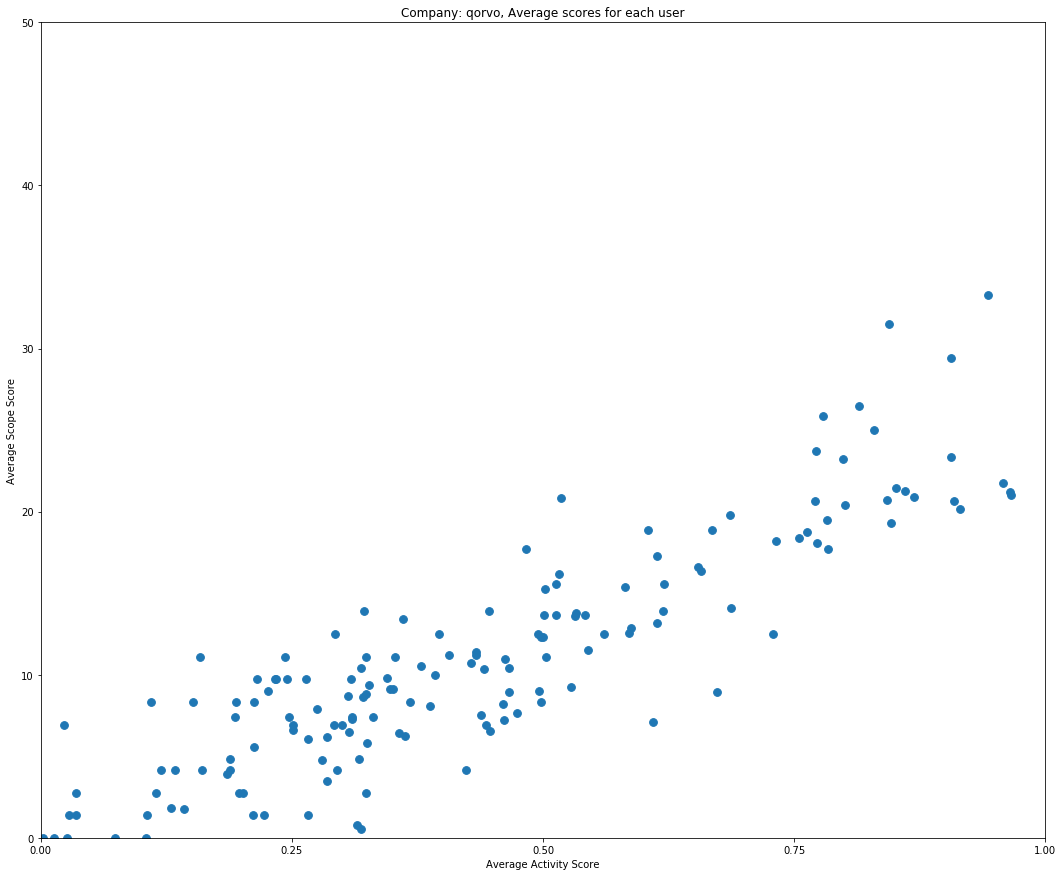

In [5]:
summary = data.groupby('user_id').agg(np.mean)[['activity', 'scope']]
summary.reset_index(inplace=True)
summary['disp_name'] = summary.user_id.apply(lambda x: data[data['user_id']==x].iloc[0].disp_name)

fig, ax = plt.subplots()
fig.set_size_inches(18,15)
data = summary
plt.scatter(data.activity, data.scope, s=60)
# for idx, row in data.iterrows():
#     ax.annotate(str(row.disp_name), (row.activity, row.scope), size=10)

ax.set_title('Company: {}, Average scores for each user'.format(company))
ax.set_ylabel('Average Scope Score')
ax.set_xlabel('Average Activity Score')
ax.set_xticks([0,.25,.5,.75,1.0])
ax.set_yticks([0,10,20,30,40,50])
ax.set_ylim([0,50])
ax.set_xlim([0,1.0])
plt.plot();

## Compare Scope across Years

For a company, look at users average activity scores in 2 years and compare them

In [28]:
def compute_user(d):
    h = f"{d.iloc[0].disp_name} - {d.iloc[0].company}"
    past_scope = d.iloc[0:3].scope.mean() * .02
    new_scope = d[d.week >= 900].iloc[0:3].scope.mean() * .02
    past_a = d.iloc[0:3].activity.mean()
    new_a = d[d.week >= 900].iloc[0:3].activity.mean()
    d_s = new_scope - past_scope
    d_a = new_a - past_a
    vlen = round((d_s**2 + d_a**2)**0.5, 2)
    if (d_s > 0) and (d_a > 0):
        direction = "positive"
    elif (d_s < 0) and (d_a < 0):
        direction = "negative"
    else:
        direction = "ambiguous"
    print("  {} {} - {}".format(vlen, direction, h))



company = 'qorvo'.lower()
data = df[df.company.apply(lambda x: company in str(x).lower())]

for uid, ldf in data.groupby('user_id'):
    i += 1
    if (ldf.week.max() - ldf.week.min()) >= 100:
        compute_user(ldf)

  0.63 negative - Mark Greene at Qorvo - Qorvo - TQTX IDP Richardson
  0.03 ambiguous - Ciaran Marmion at Qorvo - Qorvo - TQ Hilsboro
  0.12 negative - Scott Schafer @ Qorvo - Qorvo - TQTX IDP Richardson
  0.01 positive - Jeff Galipeau at Qorvo - Qorvo - TQ Apopka
  0.09 negative - Hailing Yue? at Qorvo FL - Qorvo - TQ Apopka
  0.12 negative - Mark Gallager @ Qorvo FL - Qorvo - TQ Apopka
  0.09 negative - nan - Qorvo - TQ Apopka
  0.82 negative - csanabria @ Qorvo TX - Qorvo - TQTX IDP Richardson
  0.34 positive - nan - Qorvo - RFMD Greensboro
  0.1 ambiguous - Mudar Aljoumayly @ Qorvo FL - Qorvo - TQ Apopka
  0.88 negative - nan - Qorvo - TQ Apopka
  0.01 ambiguous - Aziz Alakan @ Qorvo FL - Qorvo - TQ Apopka
  0.15 negative - nan - Qorvo - TQ Apopka
  0.11 ambiguous - Moyang Li @ Qorvo FL - Qorvo - TQ Apopka
  0.42 positive - Gonzalo Calleja @ Qorvo - Qorvo - TQ Munich
  0.09 positive - nan - Qorvo - RFMD Greensboro
  0.11 ambiguous - nan - Qorvo - TQ Munich
  0.49 negative - nan - Q

In [19]:
data.scope.max()

48.611111111111114